# Crop Price Estimation

---



**Dataset Link:** https://www.kaggle.com/datasets/gokulprasantht/crop-prediction

**Column description:**

* STATE - Crop growing state.
* SOIL_TYPE - Type of the soil that the crop is growing.
* N_SOIL - Nitrogen amount in the soil .
* P_SOIL - Phosphorous amount in the soil.
* K_SOIL - Potassium amount soil in the soil.
* TEMPERATURE - Temperature value in the area.
* HUMIDITY - Humidity value in the area.
* PH - PH value of the soil.
* RAINFALL - Rainfall amount in the area.
* CROP_PRICE - Price of the crop during selling time.
* CROP - Crop that is growing in that area.


In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading the dataset
data=pd.read_csv('crop_data.csv')
data

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper
...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Pumpkin


In [9]:
# Checking for missing values
data.isnull().sum()

STATE          0
SOIL_TYPE      0
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
CROP_PRICE     0
CROP           0
dtype: int64

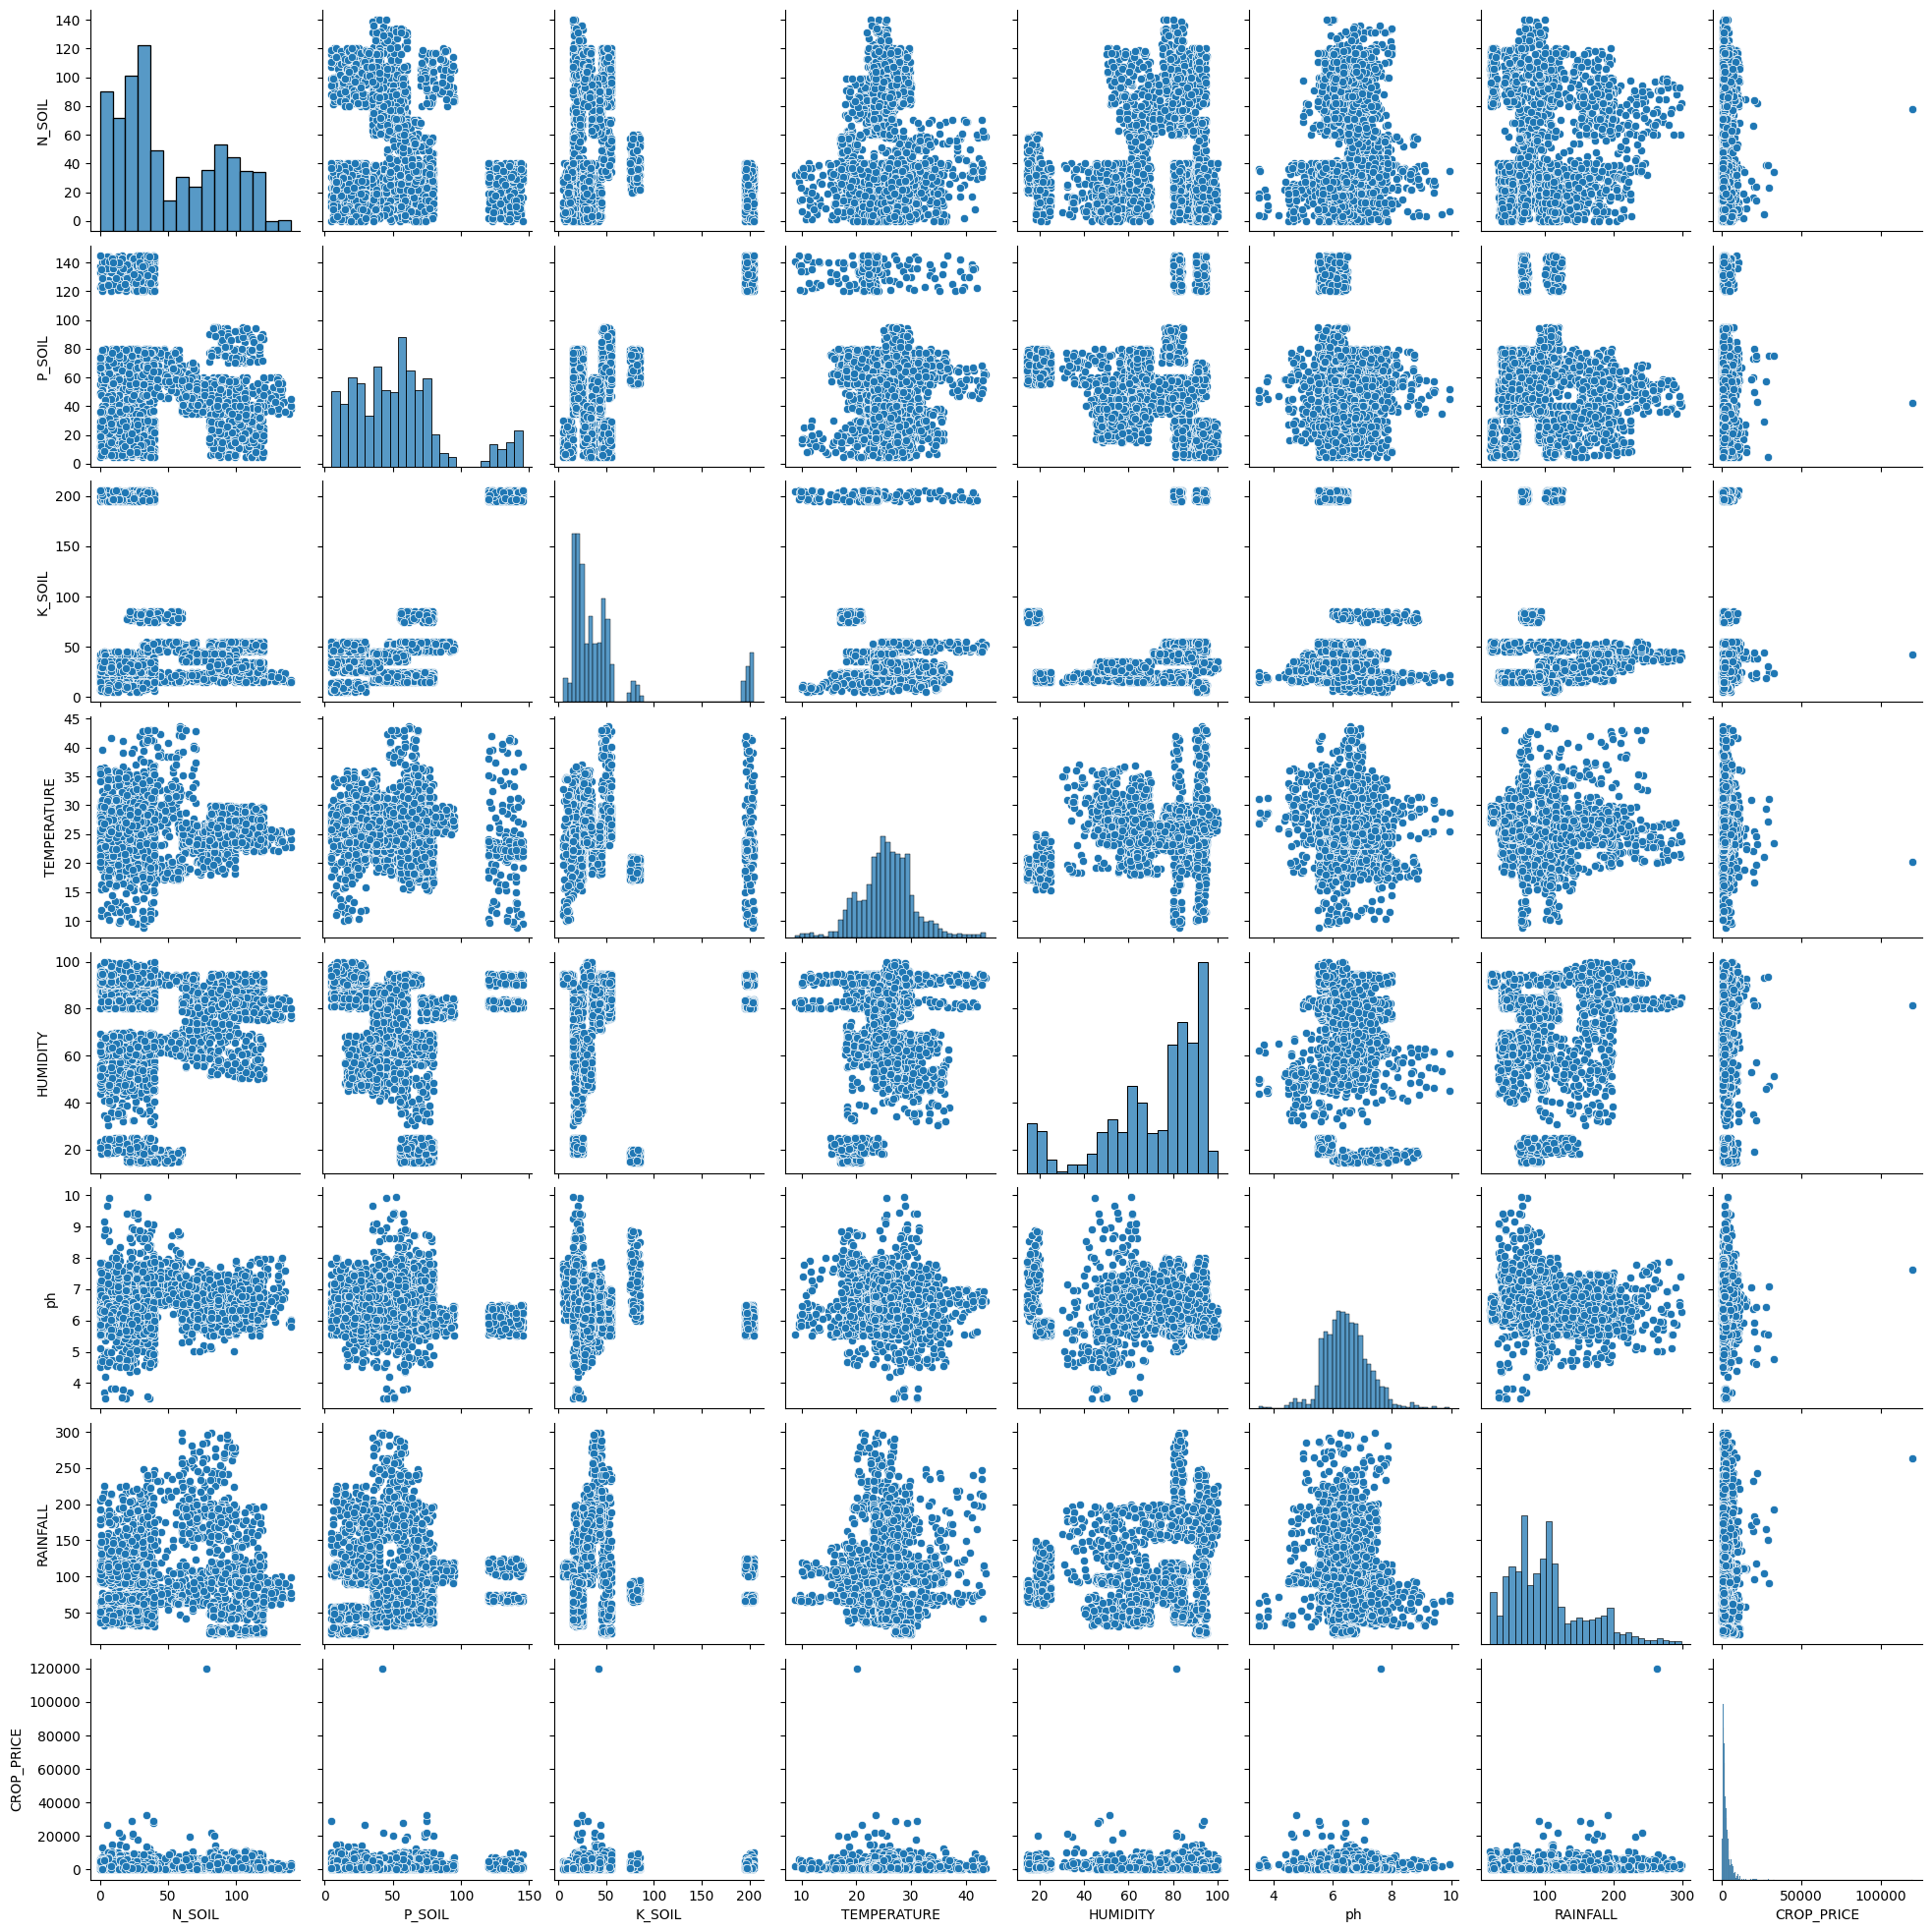

In [13]:
# Exploring relationships between variables using visualizations
sns.pairplot(data[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']])
plt.show()

<ipython-input-15-7d08b4317b81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


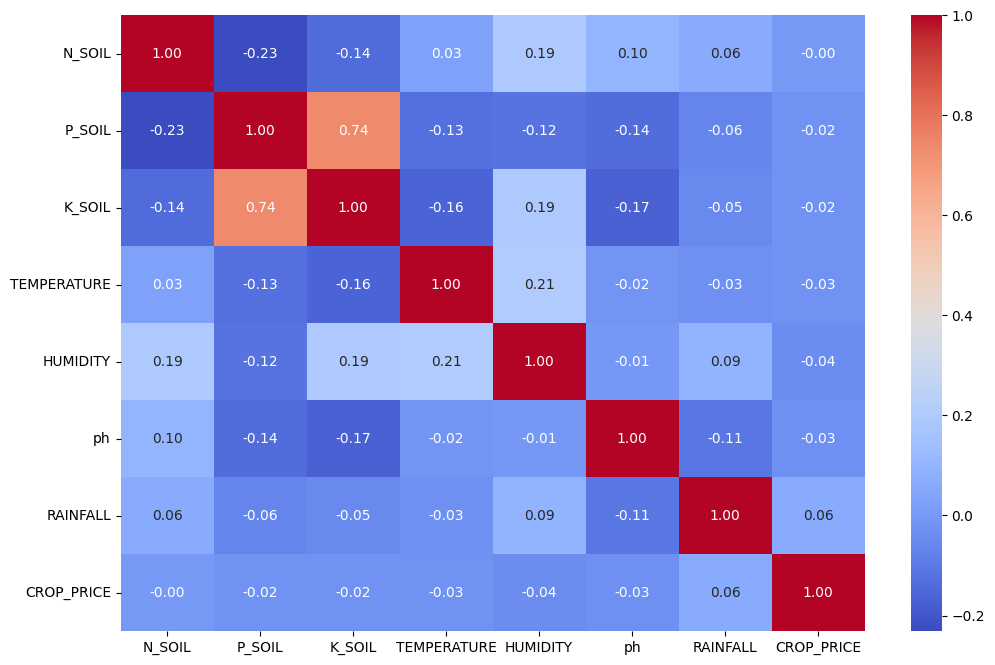

In [15]:
# Plotting a heatmap to see the correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

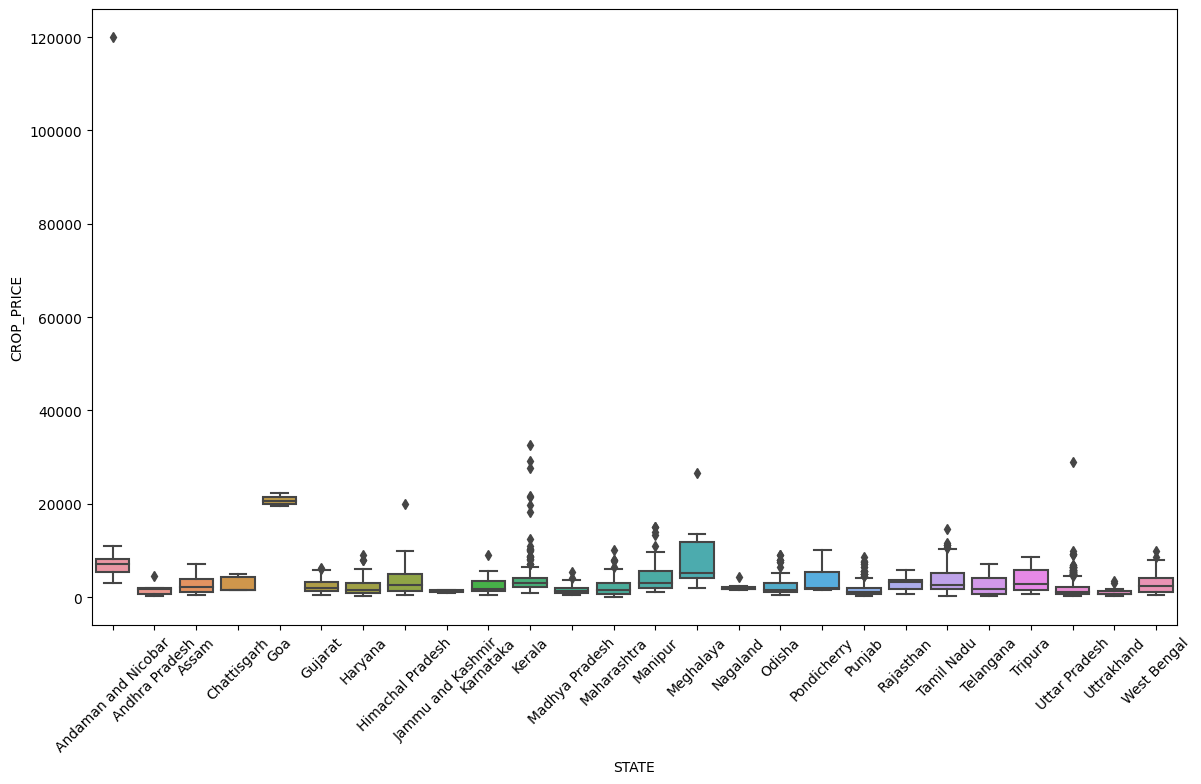

In [19]:
# State vs. Crop Price
plt.figure(figsize=(14, 8))
sns.boxplot(x='STATE', y='CROP_PRICE', data=data)
plt.xticks(rotation=45)
plt.show()

Goa has the highest crop prices out of all the states.

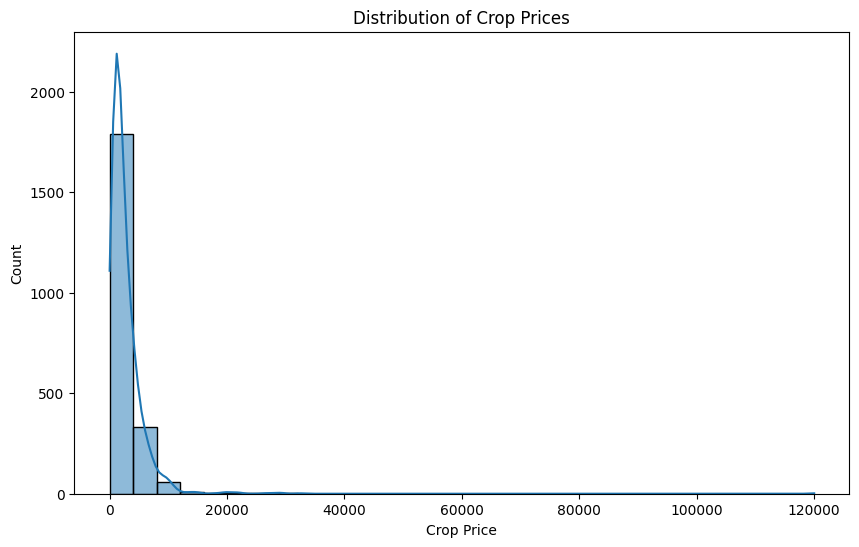

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CROP_PRICE'], bins=30, kde=True)
plt.title('Distribution of Crop Prices')
plt.xlabel('Crop Price')
plt.show()

<ipython-input-24-697267e3792c>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CROP', y='CROP_PRICE', data=data[data['CROP'].isin(top_crops)], ci=None, order=order)


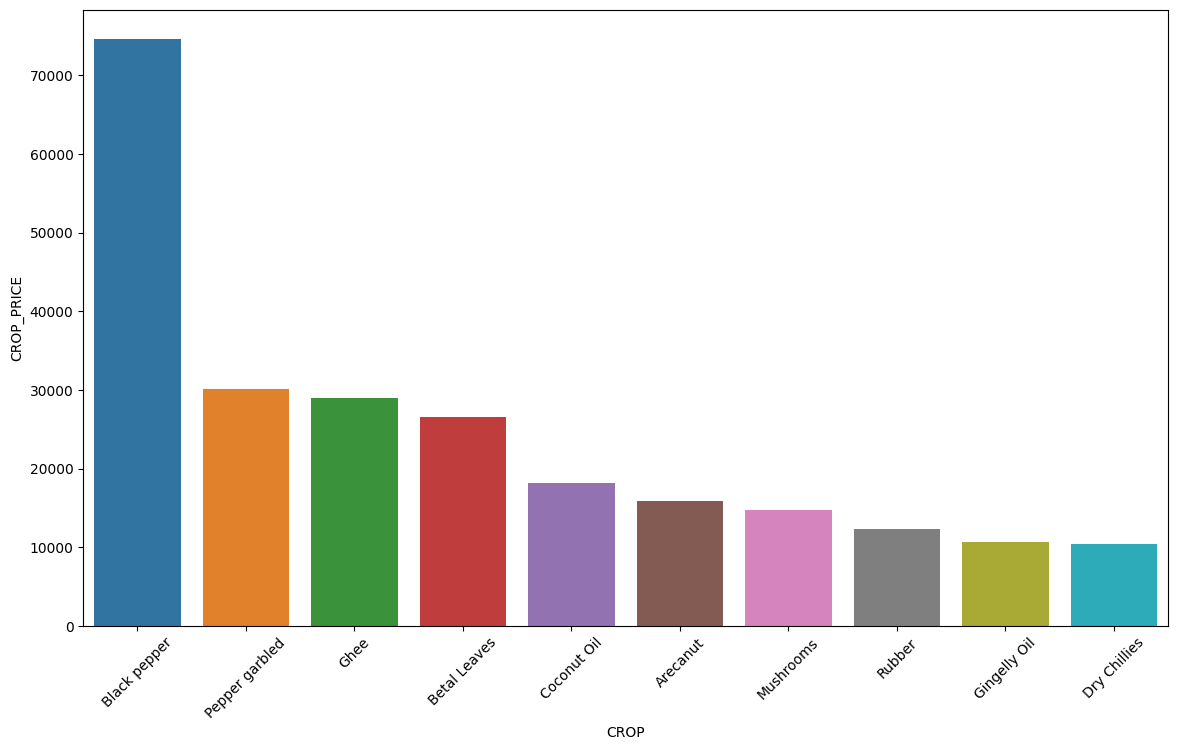

In [24]:
# Choosing the top 10 crops to display
top_n = 10
top_crops = data.groupby('CROP')['CROP_PRICE'].mean().sort_values(ascending=False).head(top_n).index

# Ordering the crops based on their average prices
order = data[data['CROP'].isin(top_crops)].groupby('CROP')['CROP_PRICE'].mean().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.barplot(x='CROP', y='CROP_PRICE', data=data[data['CROP'].isin(top_crops)], ci=None, order=order)
plt.xticks(rotation=45)
plt.show()

These are the top 10 crops with the highest average prices.

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to 'STATE', 'SOIL_TYPE', and 'CROP'
data['STATE'] = label_encoder.fit_transform(data['STATE'])
data['SOIL_TYPE'] = label_encoder.fit_transform(data['SOIL_TYPE'])
data['CROP'] = label_encoder.fit_transform(data['CROP'])

In [28]:
# Scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']] = scaler.fit_transform(data[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP_PRICE']])

In [30]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = data.drop('CROP_PRICE', axis=1)
y = data['CROP_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we can work on building a machine learning model for crop price estimation.